# Normality Tests and Data Transformation (Box-Cox)
Statistical hypothesis test are used to see if two groups of things are the same. The more powerful tests, like the Student's T-test and ANOVA require a Normal distribtuion of data. If the data are skewed they can be transformed to a Normal using a power function such as the Box-Cox method. A really good example is given by Aaron Brown (https://www.quora.com/What-are-some-useful-applications-of-Box-Cox-transformations) that examines income inequality with a "heavy- tailed" skewed distribution of households, where skewness is a measure of income inequality from one year to the next. But, the data needs to be transformed to a Normal distribution before the standard deviation can be measured.
- This Jupyter Notebook looks at different methods for testing for nomality and if needed, transforming the data to a Normal distribution using a **Power-Normal** function, aka, **Box-Cox**
- Testing a distribution for normality can be accomplished in at least three ways:
    1. **Visual graphic inspection of the data:** Histograms, PDF, Box and Whisker, Quantile-Quantile (Q-Q) plots
    2. **Descriptive statistics of the data:** The mean, median and mode of the data should be essentially the same and skewness and kurtosis should be small
    3. **Numeric Normality tests**, e.g. Shapiro-Wilks: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411 
<br>
<br>
    
- <u>**Box-Cox Transformation:**</u> David Box and George Cox (1964) method solves for an exponent (lambda, λ) that transforms a skewed distribution to Normal
- y(λ) = (yλ – 1) / λ  if y ≠ 0
- y(λ) = log(y)  if y = 0

Also see the p-value Jupyter Notebook for quantification of normality tests

D.M. Advocate October 30, 2023

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Create Some Distributions to Transform and Test for Normality

### Set the Min, most-likely and Max values for creating the Beta Distributions
- **Test a normal, skewed, strongly skewed and lognormal distributions**
- <u>Suggested Values<u>
- Normal: 75-100-125 ( for normal or Beta symmetrical)
- Skewed: 75-100-200 (slightly asymmetrical Beta)
- Stronly Skewed: 75-100-500 (strongly asymmetrical Beta)
- Lognormal: 25-250-1650

In [2]:
# Change the Min, ml and max values and L (lambda to experiment with the outcomes)
min=25                # Minimum Value 
ml=250                # Most-Likely Value
max=1650                # Maximum Value
size=1000             # Some Statistical Normality Tests may not be accurate for >5000 trials
L = 10                 # Beta distribution dispersion factor (lambda)

### Descriptive Statistics Function

In [3]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: .4f}'.format(np.mean(var)))
    print('sem:    ','{: .4f}'.format(stats.sem(var)))
    print('median: ','{: .4f}'.format(np.median(var)))
    print('min:    ','{: .4f}'.format(np.min(var)))
    print('max:    ','{: .4f}'.format(np.max(var)))
    print('stdev:  ','{: .4f}'.format(np.std(var)))
    print('skew:   ','{: .4f}'.format(skew(var)))
    print('kurt:   ','{: .4f}'.format(kurtosis(var)))
    print('p05:    ','{: .4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: .4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: .4f}'.format(np.percentile(var,95)))
    print('Count   ','{: .0f}'.format(np.size(var)))

### Beta Distribution
The Beta distribution is an easy method for generating a bounded distribution from the Min, ML and Max values assigned above. It has two shape parameters that can be modified with a dispersion factor (𝜆):
- 𝛼 and 𝛽 are shape parameters, where 𝜆 is a dispersion factor: 𝜆=10 approximates the normal distribution. Smaller values (𝜆 < 10) increase the spread with 0.001 approximating a uniform distribution. 
- 𝜆 = 4 is equivalent to the older versions of the Beta-PERT method that didn't use a lambda dispersion factor.
> <u>Formula for Calculating shape factors:<u><br>
> 𝛼=1+ 𝜆 * (mode - min) / (max - min) <br>
> 𝛽=1+ 𝜆 * (max - mode) / (max - min)
- For modeling scipy's beta PDF inputs are:
    - 𝛼 , 𝛽, loc (lower limit), scale (upper limit - lower limit)

A NORMAL DISTRIBUTION IS PLOTTED FOR COMPARISON


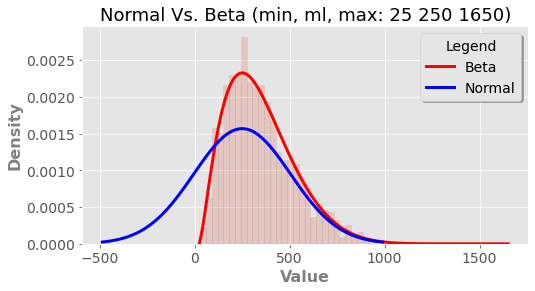

Beta Distribution shape parameters, alpha and beta:  2.4 10.0 

Beta Distribution
Descriptive Statistics
mean:     344.8625
sem:      5.6284
median:   315.0180
min:      29.6433
max:      945.0062
stdev:    177.8975
skew:     0.7692
kurt:     0.1593
p05:      110.1237
p50:      315.0180
p95:      691.1739
Count     1000


In [4]:
# Beta Distribution
from scipy.stats import beta
from scipy.stats import norm

amin = min
bml =  ml
cmax = max
L = L

# Shape parameters 𝛼 and 𝛽
a = 1 + L * (bml-amin)/(cmax-amin)
b = 1 + L * (cmax-bml)/(cmax-amin)

# Beta Distribution
bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=size, random_state=None)

# Normal Distribution for comparison
# Using the "Range Rule" to estimate the standard deviation
nstd = (max-min) / (3*np.sqrt(np.log(size))-1.5)

nvals = norm.rvs(loc=ml, scale=nstd, size=size, random_state=None)
nx = np.linspace(np.min(nvals), np.max(nvals), 100)
ny=norm.pdf(nx, ml, nstd)

print("A NORMAL DISTRIBUTION IS PLOTTED FOR COMPARISON")
fig = plt.figure(figsize=(8,4))
plt.plot(bx, by, lw=3, c='r', label="Beta")
plt.plot(nx, ny, lw=3, c='b', label="Normal")
plt.hist(bvals, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.title('Normal Vs. Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(loc="upper right", fontsize=14, title='Legend', shadow=True)
plt.show()

# Print Descriptive Statistics
print('Beta Distribution shape parameters, alpha and beta: ', np.round(a,1),np.round(b), '\n')
print('Beta Distribution')
my_stats(bvals)

### Lognormal Distribution
- If sufficient data is availble, e.g., 100 samples whose histogram looks Lognormal, Scipy's <i>lognorm.fit<i> function can be used to derive the parameters needed to model a Lognormal distribution.
- However, fitting a lognormal distribution to the Min-ML-Max values is not as simple as one would think because the median (mu) and standard deviation (sigma) are not known.
- An intermediate process is to build a Beta or Triangle distribution from the Min-ML-Max values. Then use Scipy's <i>lognorm.fit<i> function to derive the needed parameters.
- The key parameters for the distribution are shape, locations (loc) and Scale. Where, shape (s) =sigma, loc=min x value, scale=median, size=the number of random samples, random_state=seed value for the random values or None, x=linespace values

Scipt syntax:
- lognorm.rvs(s, loc=min, scale=ml, size=size, random_state=None)
- lognorm.pdf(x, shape, loc=loc, scale=scale)
- Where,shape (s)=sigma, loc=min x value, scale(mu)=median, size=number of trials, random_state=a seed for the random values or None, x=the linespace values

**The easiest method for parameterizing the Lognormal distribution is to use the *lognorm.fit* function applied to the Beta distribution random values created above**


NOTE: DESPITE THE LOGNORMAL PARAMETERS BEING EXTRACTED FROM THE BETA DISTRIBUTION,
THE TWO PDFs ARE NOT A PERFECT MATCH


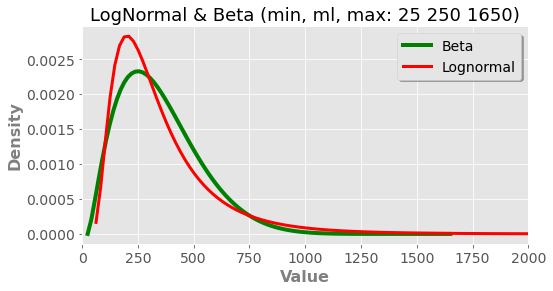

Lognormal shape, Loc & Scale parameters:  0.65 25.00 267.67

Lognormal:
Descriptive Statistics
mean:     357.1322
sem:      7.5946
median:   290.9179
min:      62.4438
max:      2143.2788
stdev:    240.0438
skew:     2.3989
kurt:     9.6276
p05:      121.5023
p50:      290.9179
p95:      839.5435
Count     1000


In [5]:
#Lognormal Distribution
from scipy.stats import lognorm

lnmin= min
lnml= ml
lnmax= max

####### USING THE EXTRACTED VALUES FROM THE BETA DISTRIBUTION ########

# Extract the Beta model shape parameters for the lognormal distribution
shape, loc, scale = stats.lognorm.fit(bvals, floc=min)
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)

# Calculate the x and y values to plot the lognormal PDF
lnx = np.linspace(np.min(lnvals), np.max(lnvals), 100)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)

print('NOTE: DESPITE THE LOGNORMAL PARAMETERS BEING EXTRACTED FROM THE BETA DISTRIBUTION,')
print('THE TWO PDFs ARE NOT A PERFECT MATCH')

fig = plt.figure(figsize=(8,4))
plt.plot(bx, by,lw=4, c='g', label='Beta')
plt.plot(lnx, lny, lw=3, c='r', label='Lognormal')
#plt.xlim(lnmin, lnmax)
#plt.yscale('log')
plt.title('LogNormal & Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.xlim(0, 2000)
plt.legend(fontsize=14, shadow=True)
plt.show()

# Print Descriptive Statistics
print("Lognormal shape, Loc & Scale parameters: ",'%.2f'%shape, '%.2f'%loc, '%.2f'%scale)
print("\n" + "Lognormal:")
my_stats(lnvals)

## Transform Data to Normal (Box-Cox)

- The sections of the Jupyter Notebook demonstrate the Box-Cox method that transforms a skewed distribution to normal
- Scipy's <i>**stats.boxcox**<i> function does the work and uses the following formulas:
> y(λ) = (yλ – 1) / λ  if y ≠ 0 <br>
> y(λ) = log(y)  if y = 0
- Also demonstrated are normality tests: visual inspection of histograms, PDF and Q-Q Plot before and after transformation 
<br>
<br>
**<u>Typical Normality Tests</u>**<br>
    1. Compared the mean and median<br>
    2. Visual inspection of PDFs<br>
    3. Q-Q Probability Plot<br>
    4. Statistical values that test for a critical value (p-value)
- Good Ref: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411




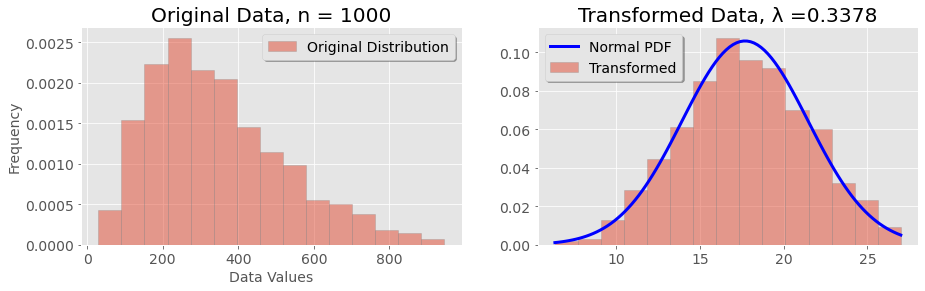

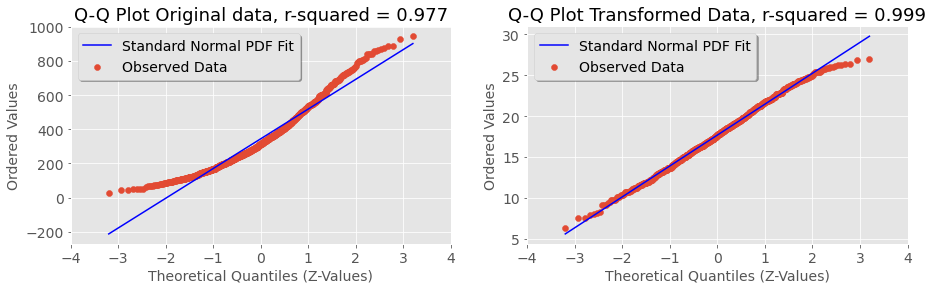

In [6]:
#################################### Test for Log Normality
from scipy.stats import kstest
from scipy.stats import shapiro
import scipy
import pylab
from scipy.stats import boxcox 

#################################
# BOX-COX TRANSFORMATION
#################################
# X values to be evaluated, i.e., bvals, nvals, lnvals as designated cells above

dist_type='bvals'#<====== Specify which distribution random values to use, i.e., nvals, bvals or lnvals

if dist_type=='bvals': 
    Xvalue=bvals
elif dist_type=='nvals':
    Xvalue=nvals
elif dist_type=='lnvals':
    Xvalue=lnvals

# How to deal with negative values
if np.min(Xvalue) < 0:
    Xvalue = Xvalue + (-1*np.min(Xvalue)+1)

transformed_data, best_lambda = boxcox(Xvalue)     # This does the BoxCox transformation

######################################################################################
## This Technique will make the Q-Q Plot, but limits customizing or gridding the plots
# Q-Q Plot before Transformation
# scipy.stats.probplot(Xvalue, dist="norm", plot=pylab)
# plt.title('Q-Q Plot Before Transformation', fontsize=18)
# pylab.show()
######################################################################################

## This Technique for Q-Q Plots allow gridding subplots and customizing plots
## Note: probplot function outputs stacked arrays (qq_array)
qq_array1 = scipy.stats.probplot(Xvalue, dist="norm", plot=None)
x1, y1 = qq_array1[0]
slope1, intercept1, r1 = qq_array1[1]

qq_array2 = scipy.stats.probplot(transformed_data, dist="norm", plot=None)
x2, y2 = qq_array2[0]
slope2, intercept2, r2 = qq_array2[1]

# Histogram After Transformation
tx=np.linspace(np.min(transformed_data), np.max(transformed_data), 100)
ty=norm.pdf(tx, np.mean(transformed_data), np.std(transformed_data))

# Plot Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.hist(Xvalue, bins=15, edgecolor='gray',density=True, alpha=.5, label='Original Distribution')
#ax1.plot(tx, ty, c=b, scale=np.std(data)), label='Normal PDF')
ax1.set_title('Original Data, n = ' + str(np.size(Xvalue)))
ax1.set_xlabel('Data Values', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.legend(shadow=True,fontsize=14)

ax2.hist(transformed_data, bins=15, edgecolor='gray', density=True, alpha=.5, label='Transformed')
ax2.plot(tx, ty, lw=3, c='b', label="Normal PDF")
ax2.set_title('Transformed Data, λ =' +str(np.round(best_lambda,4)) )
ax2.legend(fontsize=14, shadow=True)
plt.show()

# Plot Q-Q Plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.scatter(x1, y1, label='Observed Data')
ax1.plot(x1, x1*slope1+intercept1, c='b', label='Standard Normal PDF Fit')
ax1.legend(shadow=True)
ax1.set_title('Q-Q Plot Original data, r-squared = ' + str(np.round(r1,3)), fontsize=18)
ax1.set_xlim(-4, 4)
ax1.set_xlabel('Theoretical Quantiles (Z-Values)', fontsize=14)
ax1.set_ylabel('Ordered Values', fontsize=14)

ax2.scatter(x2, y2, label='Observed Data')
ax2.plot(x2, x2*slope2+intercept2, c='b', label='Standard Normal PDF Fit')
ax2.legend(shadow=True)
ax2.set_title('Q-Q Plot Transformed Data, r-squared = ' + str(np.round(r2,3)), fontsize=18)
ax2.set_xlim(-4, 4)
ax2.set_xlabel('Theoretical Quantiles (Z-Values)', fontsize=14)
ax2.set_ylabel('Ordered Values', fontsize=14)
plt.show()


### Descriptive Statistics Before and After Transformation

In [7]:
# Statistics  Before and After Transformation
print('Before Transform')
my_stats(Xvalue)
print('\n''After Transform ')
my_stats(transformed_data)


Before Transform
Descriptive Statistics
mean:     344.8625
sem:      5.6284
median:   315.0180
min:      29.6433
max:      945.0062
stdev:    177.8975
skew:     0.7692
kurt:     0.1593
p05:      110.1237
p50:      315.0180
p95:      691.1739
Count     1000

After Transform 
Descriptive Statistics
mean:     17.6938
sem:      0.1193
median:   17.7050
min:      6.3409
max:      26.9896
stdev:    3.7696
skew:    -0.0250
kurt:    -0.4064
p05:      11.5295
p50:      17.7050
p95:      23.9866
Count     1000


### Normality Tests
While there are a number of Normality Tests, they don't always provide the same result. **Just because a distribution (especially a bounded distribution) may be symmetrical, it is not necessarily "Normal"**, aka "*Gaussian." This is particularly true with Beta distributions with a smaller dispersion values (λ). <br>
For a good review see: "10 Normality Tests in Python (Step-By-Step Guide 2020)", by 
Sivasai Yadav Mudugandla, https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411 (The Python code for normality tests below were taken from this article)
- In the following cell, we examine 6 statistical Normality tests, plus visual inspection of charts and descriptive statistics
- Note: Scipy's <i>**stats.chisquare**<i> function almost allways gives a p-value >0.05, even with asymmetrical distributions
- Note: **These normality tests are sensitive to the sample size of the data (n) amoung other factors.** 
- Jarque-Bera works best with > 2000 samples
- The Kolmogorov-Smirnov is tested against a **Standard Normal** distribution, so the data your testing needs to be standardized, i.e. Z-Score. Sklearn has a ***processing.scale*** function that does this.
- **In the cell below, vary the number of samples (n): try 50 and 5000. Also there are 8 distributions (*data*) to choose from.**

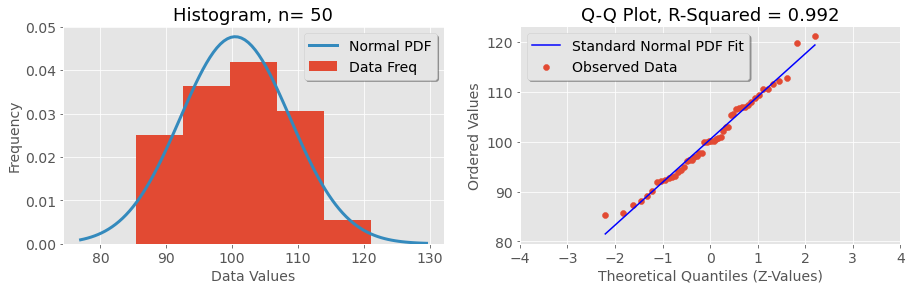

Shapiro-Wilk Stat & Pvalue: 0.979 0.519
Probably Gaussian 

Anderson-Darling stat:  0.979
Probably Gaussian : 0.538 critical value at 15.0 level of significance
Probably Gaussian : 0.613 critical value at 10.0 level of significance
Probably Gaussian : 0.736 critical value at 5.0 level of significance
Probably Gaussian : 0.858 critical value at 2.5 level of significance
Probably Gaussian : 1.021 critical value at 1.0 level of significance


This unbinned Chi-Square test in unreliable, see following cells for the binned analysis
chi-Square stat & Pvalue:  34.811 0.937
Probably Gaussian 

Kolmogorv-Smirnov stat & Pvalue:  0.074 0.926
Probably Gaussian 

Lillifors stat & Pvalue:  0.075 0.691
Probably Gaussian 

D'Agnosto stat & Pvalue:  1.024 0.599
Probably Gaussian 

Jarque-Bera stat & Pvalue:  1.072 0.585
Probably Gaussian 

Descriptive Statistics
mean:     100.4699
sem:      1.1948
median:   100.1503
min:      85.3463
max:      121.1766
stdev:    8.3636
skew:     0.3030
kurt:    -0.3840

In [92]:
# IN THIS CELL, CHANGE THE SAMPLE NUMBER (n)

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import triang
from scipy.stats import chi2
from scipy.stats import kstest      # Kolmogorov-Smirnov
from scipy.stats import shapiro     # Shapiro-Wilks
from scipy.stats import chisquare   # Chi-Square
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import normaltest  # D'Agnosto Test
from scipy.stats import jarque_bera # Jarque-Bera
from statsmodels.stats.diagnostic import lilliefors #Lillierfors
from sklearn import preprocessing   # Need to standardize the normal distribution, i.e., mean=0, std=1
import numpy as np
import scipy
import pylab
from scipy.stats import boxcox 


n=50 # <======= !!!!!! SET THE SAMPLE SIZE !!!!!! ============================

########### Data Sets to test against ######################
# SELECT A DISTRIBUTION TO TEST
#data = uniform.rvs(size=n)
#data = triang.rvs(.5, loc=100, scale=20, size=n, random_state=None)     # Triangle Distribution
#data = norm.rvs(loc=100, scale=20, size=n, random_state=None)           # Normal Distribution
#data = beta.rvs(1.8, 4.2, loc=75, scale=50, size=n, random_state=None)  # Skewed Beta Distribution
#data = beta.rvs(1, 1, loc=75, scale=50, size=n, random_state=None)      # Symmetical Uniform-like Beta Distribution
data = beta.rvs(3, 3, loc=75, scale=50, size=n, random_state=None)      # Symmetical Tiangle-like Beta Distribution
#data = beta.rvs(6, 6, loc=75, scale=50, size=n, random_state=None)      # Symmetical Normal-like Beta Distribution
#data=transformed_data                                                   # Default: Distribution specified in input section

# Q-Q Plot of data
nbins=int(np.log2(np.size(data)))
qq_array = scipy.stats.probplot(data, dist="norm", plot=None)
x, y = qq_array[0]
slope, intercept, r = qq_array[1]

# For Normal Distribution referece PDF on histogram plot
fx = np.linspace(np.min(data)-np.std(data), np.max(data)+np.std(data), 100)

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.hist(data, bins=nbins, density=True, label='Data Freq')
ax1.plot(fx, norm.pdf(fx, loc=np.mean(data), scale=np.std(data)), lw=3, label='Normal PDF')
ax1.set_title('Histogram, n= ' + str(np.size(data)), fontsize=18)
ax1.set_xlabel('Data Values', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.legend(shadow=True)
ax2.scatter(x, y, label='Observed Data')
ax2.plot(x, x*slope+intercept, c='b', label='Standard Normal PDF Fit')
ax2.legend(shadow=True)
ax2.set_title('Q-Q Plot, R-Squared = ' + str(np.round(r,3)), fontsize=18)
ax2.set_xlim(-4, 4)
ax2.set_xlabel('Theoretical Quantiles (Z-Values)', fontsize=14)
ax2.set_ylabel('Ordered Values', fontsize=14)
plt.show()

########## NORMALITY TESTS ######################################

# Shapiro-Wilk Normality Test, considered the most powerful test
stat, p = shapiro(data)
print("Shapiro-Wilk Stat & Pvalue: " '%.3f'%stat, '%.3f'%p)
if p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# Anderson Darling
result = anderson(data)
print('Anderson-Darling stat: ' , '%.3f'%stat)
for i in range(len(result.critical_values)):
        sig_lev, crit_val =result.significance_level[i], result.critical_values[i]
        if result.statistic < crit_val:
            print(f'Probably Gaussian : {crit_val} critical value at {sig_lev} level of significance')
        else:
            print(f'probably not Gaussian : {crit_val} critical value at {sig_lev} level of significance')
print('\n')

# Chi-Square Normality Test
cs_stat, cs_p = chisquare(data)
print('This unbinned Chi-Square test in unreliable, see following cells for the binned analysis')
print('========================================================================================')
print("chi-Square stat & Pvalue: ", '%.3f'%cs_stat, '%.3f'%cs_p)
if cs_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# Kolmogorov-Smirnov goodness-of-fit (Takes a different data format)
standard = preprocessing.scale(data)              # converts the data to a z-score 
ks_stat, ks_p = kstest(standard,'norm')
print("Kolmogorv-Smirnov stat & Pvalue: ", '%.3f'%ks_stat, '%.3f'%ks_p)
if ks_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")
    
# Lilliefors Normality Test - A version of the Kolmogorov-Smirnov Test
l_stat, l_p = lilliefors(data)
print("Lillifors stat & Pvalue: ", '%.3f'%l_stat, '%.3f'%l_p)
if l_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")

# D’Agostino’s K-squared Test
# D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis.
da_stat, da_p = normaltest(data)
print("D'Agnosto stat & Pvalue: ", '%.3f'%da_stat, '%.3f'%da_p)
if da_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probably not Gaussian", "\n")

# Jarque-Bera looks at skewness and Kurtosis matching a normal Distribution
# Works for datasets with > 2000 trials
jb_stat, jb_p = jarque_bera(data)
print("Jarque-Bera stat & Pvalue: ", '%.3f'%jb_stat, '%.3f'%jb_p)
if jb_p >=.05:
    print("Probably Gaussian", "\n")
else:
    print("Probalbly not Gaussian", "\n")
    
my_stats(data)
# df_describe = pd.DataFrame(data, columns=['Stats'])
# display('Descriptive Statistics:', df_describe.describe())    


## Binned Chi-Square Normality Test
- I've writen a binned analysis of Chi-Square test because Scipy's Chi-Square Normality test is not reliable
- My research shows that for large numbers of samples > ~20, data needs to be binned
- The number of bins is very important, too many bins will cause the Chi-Square stat to be too large
- Sturges (1926) suggested using 1+log2(n) to determin the number of bins, where n = data count
- Some workers suggest using a value of 6 bins

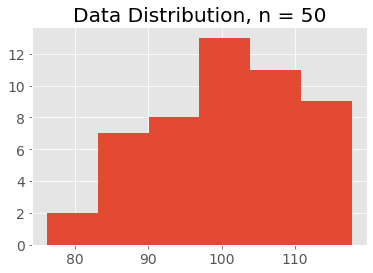

Number of bins used =   6
Degrees of Freedom =    3
Critical Value =        0.05
Chi_Square Statistic =  3.28
p-value =               0.35
PROBABLY GAUSSIAN


 BINNED DATA TABLE


,freq,bins,cdf,cdf_pct,expected,diff
0,2.0,83.137722,0.037215,0.037215,1.860733,0.010423
1,7.0,90.052563,0.138191,0.100976,5.048819,0.754059
2,8.0,96.967403,0.347160,0.208969,10.448431,0.573753
3,13.0,103.882243,0.618858,0.271698,13.584905,0.025183
4,11.0,110.797084,0.840852,0.221994,11.099700,0.000896
5,9.0,117.711924,0.954815,0.113963,5.698152,1.913287


'Descriptive Statistics:'

,Stats
count,50.000000
mean,100.874811
std,10.043450
min,76.222882
25%,93.765902
50%,101.996216
75%,108.726108
max,117.711924


In [150]:
n=50 # <======= !!!!!! SET THE SAMPLE SIZE !!!!!! ============================

########### Data Sets to test against ######################
# SELECT A DISTRIBUTION TO TEST
#data = uniform.rvs(size=n)
#data = triang.rvs(.5, loc=100, scale=20, size=n, random_state=None)     # Triangle Distribution
#data = norm.rvs(loc=100, scale=20, size=n, random_state=None)           # Normal Distribution
#data = beta.rvs(1.8, 4.2, loc=75, scale=50, size=n, random_state=None)  # Skewed Beta Distribution
#data = beta.rvs(1, 1, loc=75, scale=50, size=n, random_state=None)      # Symmetical Uniform-like Beta Distribution
data = beta.rvs(3, 3, loc=75, scale=50, size=n, random_state=None)      # Symmetical Tiangle-like Beta Distribution
#data = beta.rvs(6, 6, loc=75, scale=50, size=n, random_state=None)      # Symmetical Normal-like Beta Distribution
#data=transformed_data                                                   # Default: Distribution specified in input section

# Determine the number of bins
nbins=int(1+np.log2(np.size(data)))

# Caluclate the the frequencies for each bin
freq, bins, edges = plt.hist(data, bins=nbins)
plt.title ('Data Distribution, n = ' + str(n))
plt.show()

# The first value in the bin array needs to be removed. The plt.hist function produces
# nbins+1, where the last element of the array is the max value of the data and results
# with the freq and bins arrays having the same length
bins = bins[1:]

# Merge the frequency and bins arrays into a dataframe
mrg_arrays = np.array([freq,bins])
df = pd.DataFrame(data=[mrg_arrays[0],mrg_arrays[1]]).T
df.columns=['freq', 'bins']

# Proceedure to calculate the Observed and Expected values
df['cdf'] = norm.cdf(df['bins'], loc=np.mean(data), scale=np.std(data)) # Cumulative Distribution for Gaussian
df['cdf_pct'] = df['cdf'] - df['cdf'].shift()                           # Convert CDF to percent for each bin
df['cdf_pct'].fillna(df['cdf'] ,inplace = True)                         # Set first cdf_pct to first CDF value
df['expected'] = df['cdf_pct']*df['freq'].sum()                         # Determine the Expected Value 
df['diff']=(df['freq']-df['expected'])**2/df['expected']                # Delta Observed and Expected values
                                                                        # NOTE: Observed = Frequency

# Calculate the Chi-Square Statistic, degrees of freedom and the critical value
x2=df['diff'].sum()                # Chi-Square Statistic
deg_free=df['bins'].count()-1-2    # Degrees of Freedom = (n-1)-2, where the -2 is for the Mean and Stdev used for the CDF
critical_value = 0.05              # Generally accepted critical value

# Calculate the p-value
from scipy.stats.distributions import chi2
pvalue = chi2.sf(x2,deg_free)      # Inputs are chi-square statistic and degrees of freedom

# Report the Results
print('Number of bins used =  ', nbins)
print('Degrees of Freedom =   ', deg_free)
print('Critical Value =       ', critical_value)
print('Chi_Square Statistic = ', '%.2f'%x2)
print('p-value =              ', '%.2f'%pvalue) 
      
if pvalue >= critical_value:
    print('PROBABLY GAUSSIAN')
else:
    print('PROBABLY NOT GAUSSIAN')

print("\n\n", "BINNED DATA TABLE")
display(df)
df_describe = pd.DataFrame(data, columns=['Stats'])
display('Descriptive Statistics:', df_describe.describe())

## Chi-Square Distribution
- The Chi-Square distibution is a variation of the Gamma distribution where it's shape factor is the degrees of freedom.
- The x-axis is scaled from 0 to roughly 30 and it's units are the Chi-Square (X2) statistics
- The p-value is 1-CDF at the calcualted X2 Statistic from the Chi-Square test

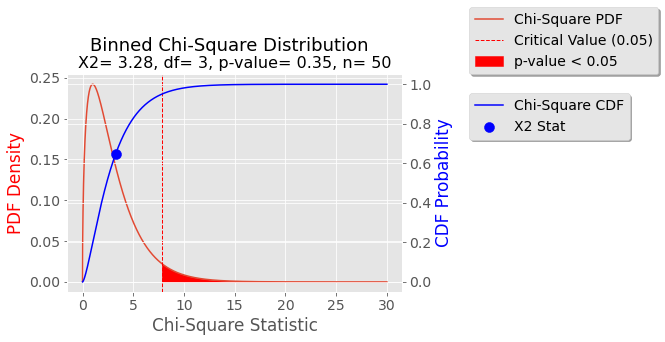

In [163]:
# This cell works off the previous calculation in section 1.4

# Find the Chi-Square Statistic for a particular p-value (in this case the critical value of .05)
import scipy as sp
crit=sp.stats.chi2.isf(.05, deg_free, loc=0, scale=1) 

#x-axis ranges from 0 to 30 with .001 steps
x = np.arange(0, 30, .001)

#plot Chi-square distribution with 4 degrees of freedom
fig, ax1 = plt.subplots()
sym_size=100
ax2 = ax1.twinx()
ax1.plot(x, chi2.pdf(x, df=deg_free), label='Chi-Square PDF')
ax1.fill_between(x, chi2.pdf(x, df=deg_free), where=((x >= crit) & (x <= 30)), color='red', label='p-value < 0.05')
ax1.axvline(x=crit, color='r', lw=1, linestyle='--', label='Critical Value (0.05)')
ax2.plot(x, chi2.cdf(x, df=deg_free), c='b', label='Chi-Square CDF')
ax2.scatter(x2, chi2.cdf(x2, df=deg_free), s=sym_size, c='b', label='X2 Stat')
plt.suptitle('Binned Chi-Square Distribution', y=1.01, fontsize=18)
plt.title('X2= ' + str('%.2f'%x2) + ', df= ' +str('%.0f'%deg_free) + ', p-value= '+str('%.2f'%pvalue) + ', n= ' + str(n), fontsize=16)
ax1.legend(shadow=True, loc=(1.2, 1))
ax2.legend(shadow=True, loc=(1.2,.7))
ax1.set_ylabel('PDF Density' , c='r')
ax2.set_ylabel('CDF Probability', c='b')
ax1.set_xlabel('Chi-Square Statistic')
plt.show()



## Chi-Square Monte-Carlo - Sensativity of sample size (n) to p-value 
- Testing a symmetrical Beta Distribution with small value shape factors
- Monte-Carlo evaluation of the effect of sample number on p-value > critical value (0.05)
- As sample number increases, the count of trials with p-value > 0.05 decreases


Minimum p-value =   0.00000
Maximum p-value =   0.00000
Number of samples =  5000
Number of trials =  1000
Trials w/ p-value > 0.05 =  0 out of 1000 trials
Percent successful trials  0.0%


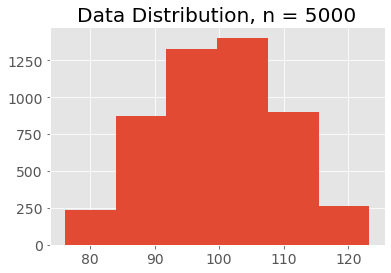

In [167]:
# chi2 function returns a p-value from a Chi-Square statistic
# Data is sampled form the distribution specified in the loop below (data1)
from scipy.stats.distributions import chi2

# Set the number of samples for defining the distribution
# Try n1=50, 500, 1000, 5000
n1=5000
trials=1000

out1=[]
out2=[]
############################ Loop Through n_trials of Binned Analysis ############################
n_trials=trials-1
i=0
while(i <=n_trials):
    data1 = beta.rvs(3, 3, loc=75, scale=50, size=n1, random_state=None)
    nbins1=int(1+np.log2(np.size(data1)))
    freq1, bins1 = np.histogram(data1, bins=nbins1)
    bins1 = bins1[1:]

    mrg_arrays1 = np.array([freq1,bins1])
    df1 = pd.DataFrame(data=[mrg_arrays1[0],mrg_arrays1[1]]).T
    df1.columns=['freq', 'bins']


    df1['cdf'] = norm.cdf(df1['bins'], loc=np.mean(data1), scale=np.std(data1)) 
    df1['cdf_pct'] = df1['cdf'] - df1['cdf'].shift()                           
    df1['cdf_pct'].fillna(df1['cdf'] ,inplace = True)                         
    df1['expected'] = df1['cdf_pct']*df1['freq'].sum()                         
    df1['diff']=(df1['freq']-df1['expected'])**2/df1['expected']                
                                                                        

    x21=df1['diff'].sum()               
    deg_free1=df1['bins'].count()-1-2 
    critical_value1 = 0.05             

    pvalue1 = chi2.sf(x21,deg_free1)     
 
      
    if pvalue1 >= critical_value:
        count=1   
    else:
        count=0
    out1.append(count)
    out2.append(pvalue1)
    
    i=i+1
############################ End of Loop ####################
print('Minimum p-value = ','{: .5f}'.format(np.min(out2)))
print('Maximum p-value = ','{: .5f}'.format(np.max(out2)))
print('Number of samples = ', n1)
print('Number of trials = ', trials)
print('Trials w/ p-value > 0.05 = ',np.sum(out1), 'out of ' +str(np.size(out1)), 'trials')
print('Percent successful trials', '{: .1%}'.format(np.sum(out1)/trials))

# Determine the number of bins
nbins1=int(1+np.log2(np.size(data)))

# Plot Histogram of Data
plt.hist(data1, bins=nbins1)
plt.title ('Data Distribution, n = ' + str(n1))
plt.show()

## Kolmogorov-Smirnov 2-Sample Tests
- Compares two distributions and determins if they are the same.
    - For example compare a symmetrical Beta distribution with (L=10) to a Normal - they usually are the same
    - **Try this experiment with n=50 and then with n=5000**
    - **Try this experiment with different disperstion factors (L)**


Kolmogorv-Smirnov stat & Pvalue:  0.140 0.717
PROBABLY THE SAME DISTRIBUTION
If the p-value is greater than the critical value (0.05), the distribution are probably the same 



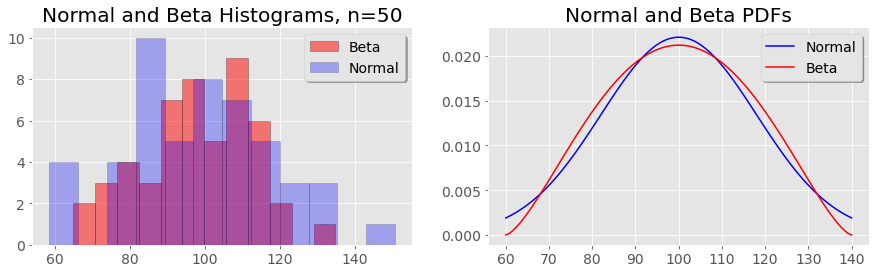

In [171]:
from scipy.stats import ks_2samp

# Beta Distribution
from scipy.stats import beta
from scipy.stats import norm

amin = 60
bml =  100
cmax = 140
L = 3
n2=50

a = 1 + L * (bml-amin)/(cmax-amin)
b = 1 + L * (cmax-bml)/(cmax-amin)

# Beta Distribution
bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=n2, random_state=None)

# Normal Distribution for comparison
# Using the "Range Rule" to estimate the standard deviation
nstd = (cmax-amin) / (3*np.sqrt(np.log(n))-1.5)                        # Range-Rule
nvals = norm.rvs(loc=bml, scale=nstd, size=n2, random_state=None)
nx = np.linspace(amin, cmax, 100)
ny=norm.pdf(nx, bml, nstd)

#perform Kolmogorov-Smirnov test
ks_stat, ks_p = ks_2samp(bvals, nvals)        # Inputs are two random sample datasets you want to test

print("Kolmogorv-Smirnov stat & Pvalue: ", '%.3f'%ks_stat, '%.3f'%ks_p)
if ks_p >=.05:
    print("PROBABLY THE SAME DISTRIBUTION")
else:
    print("PROBABLY NOT THE SAME DISTRIBUTION")
print('If the p-value is greater than the critical value (0.05), the distribution are probably the same', '\n')

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.hist(bvals, color='r', edgecolor='k', bins=12, alpha=.5, label="Beta", density=False)
ax1.hist(nvals, color='b', edgecolor='k', bins=12, alpha=.3, label="Normal", density=False)
ax2.plot(nx, ny, c='b', label="Normal")
ax2.plot(bx, by, c='r', label="Beta")
ax1.set_title('Normal and Beta Histograms, n=' + str(n2))
ax2.set_title('Normal and Beta PDFs')
ax1.legend(shadow=True)
ax2.legend(shadow=True)
plt.show()

